# Bibliotekos

## Duomenų rinkinys

Smulkios parduotuvės „užsakymų“ duomenys:

- `order_id` – užsakymo ID  
- `date` – data  
- `city` – miestas  
- `category` – kategorija (A/B/C)  
- `product` – prekė  
- `price` – vieneto kaina (EUR)  
- `qty` – kiekis  
- `channel` – kanalas (online/offline)  
- `rating` – kliento įvertinimas (1–5)  
- `revenue` – pajamos (= price × qty)


In [1]:
import pandas as pd
import numpy as np
from io import StringIO

csv = StringIO("""order_id,date,city,category,product,price,qty,channel,rating
1,2025-01-01,Vilnius,A,Widget,19.99,2,online,5
2,2025-01-01,Kaunas,B,Gadget,29.50,1,offline,4
3,2025-01-02,Klaipėda,A,Widget,18.49,3,online,5
4,2025-01-03,Šiauliai,C,Thing,9.99,5,offline,3
5,2025-01-03,Panevėžys,B,Gadget,31.00,1,online,4
6,2025-01-04,Vilnius,C,Thing,11.49,4,online,2
7,2025-01-04,Kaunas,A,Widget,20.49,1,offline,5
8,2025-01-05,Klaipėda,B,Gadget,27.99,2,online,4
9,2025-01-05,Šiauliai,C,Thing,10.49,6,offline,3
10,2025-01-06,Panevėžys,A,Widget,21.49,1,online,5
""")
df = pd.read_csv(csv, parse_dates=["date"])
df["revenue"] = df["price"] * df["qty"]
df.head()

,order_id,date,city,category,product,price,qty,channel,rating,revenue
0,1,2025-01-01,Vilnius,A,Widget,19.99,2,online,5,39.98
1,2,2025-01-01,Kaunas,B,Gadget,29.50,1,offline,4,29.50
2,3,2025-01-02,Klaipėda,A,Widget,18.49,3,online,5,55.47
3,4,2025-01-03,Šiauliai,C,Thing,9.99,5,offline,3,49.95
4,5,2025-01-03,Panevėžys,B,Gadget,31.00,1,online,4,31.00


## 1) NumPy – skaičiavimų pagrindas

**Kam skirta:** skaičiavimai su masyvais ir matricomis.


In [2]:
import numpy as np

prices = df["price"].to_numpy()
qty = df["qty"].to_numpy()
rev_vec = prices * qty 
print("Pirmos 5 pajamos (NumPy):", rev_vec[:5])
print("Vidutinė kaina:", prices.mean(), "Kiekio suma:", qty.sum())

Pirmos 5 pajamos (NumPy): [39.98 29.5  55.47 49.95 31.  ]
Vidutinė kaina: 20.092000000000002 Kiekio suma: 26


In [3]:
masyvas_a = np.array([1,2,3])
masyvas_b = np.array([4,5,6])
suma = masyvas_a + masyvas_b
print("Masyvų suma:", suma)
sandauga = masyvas_a * masyvas_b
print("Masyvų sandauga:", sandauga)

Masyvų suma: [5 7 9]
Masyvų sandauga: [ 4 10 18]


In [4]:
vidurkis = np.mean(masyvas_b)
print(vidurkis)

5.0


## 2) pandas – duomenys lentelėse

**Kam skirta:** nuskaityti, valyti, transformuoti ir agreguoti duomenis `DataFrame` formatu.


In [5]:
# Kaip lentelė atrodo
display(df.head())

# Greita agregacija: vidutinė kaina pagal kategoriją
agg = df.groupby("category", as_index=False)["price"].mean().rename(columns={"price":"avg_price"})
display(agg)

,order_id,date,city,category,product,price,qty,channel,rating,revenue
0,1,2025-01-01,Vilnius,A,Widget,19.99,2,online,5,39.98
1,2,2025-01-01,Kaunas,B,Gadget,29.50,1,offline,4,29.50
2,3,2025-01-02,Klaipėda,A,Widget,18.49,3,online,5,55.47
3,4,2025-01-03,Šiauliai,C,Thing,9.99,5,offline,3,49.95
4,5,2025-01-03,Panevėžys,B,Gadget,31.00,1,online,4,31.00


,category,avg_price
0,A,20.115000
1,B,29.496667
2,C,10.656667


## 3) SciPy – statistika ir testai

**Kam skirta:** hipotezių testai, paskirstymai, optimizavimas.


In [6]:
from scipy import stats

# Pvz.: ar A ir B kategorijų kainų vidurkiai skiriasi? (t-testas, demonstracinis)
a_prices = df.loc[df["category"]=="A","price"]
b_prices = df.loc[df["category"]=="B","price"]
t, p = stats.ttest_ind(a_prices, b_prices, equal_var=False)
print(f"t={t:.3f}, p={p:.4f}")

t=-8.765, p=0.0010


In [7]:
print(f"Vidurkis_A:{a_prices.mean()}")
print(f'Vidurkis_B:{b_prices.mean()}')

Vidurkis_A:20.115
Vidurkis_B:29.496666666666666


## 4) matplotlib – bazinė vizualizacija

**Kam skirta:** linijinės, stulpelinės, sklaidos diagramos; pritaikomos ašys ir anotacijos.


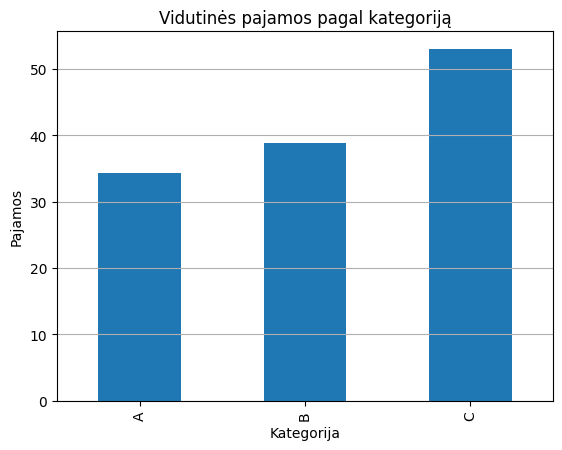

In [8]:
import matplotlib.pyplot as plt

avg_rev = df.groupby("category")["revenue"].mean()
plt.figure()
avg_rev.plot(kind="bar")
plt.title("Vidutinės pajamos pagal kategoriją")
plt.xlabel("Kategorija"); plt.ylabel("Pajamos")
plt.grid(True, axis="y")
plt.show()

## 5) seaborn – statistinė vizualizacija

**Kam skirta:** greiti, estetiški grafikai ant matplotlib: paskirstymai, ryšiai, heatmap'AI.


<Axes: xlabel='price', ylabel='qty'>

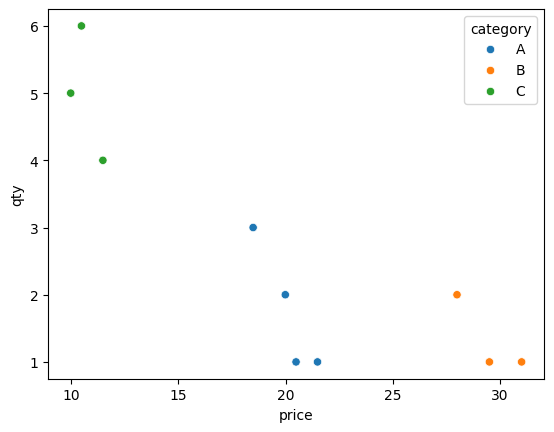

In [9]:
import seaborn as sns

sns.scatterplot(data=df, x="price", y="qty", hue="category")

<Axes: xlabel='category', ylabel='revenue'>

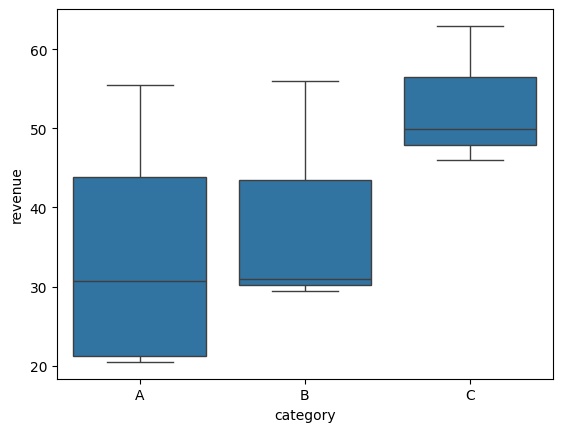

In [10]:
sns.boxplot(data=df, x="category", y="revenue")

            price       qty   revenue    rating
price    1.000000 -0.853450 -0.474724  0.502203
qty     -0.853450  1.000000  0.795890 -0.688247
revenue -0.474724  0.795890  1.000000 -0.470181
rating   0.502203 -0.688247 -0.470181  1.000000


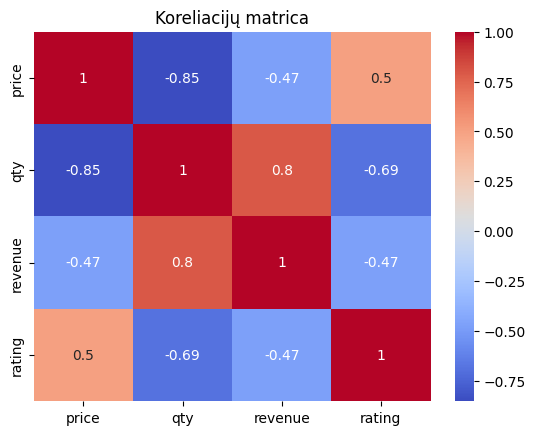

In [11]:
corr = df[["price", "qty", "revenue", "rating"]].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Koreliacijų matrica")
plt.show()

## 6) Plotly – interaktyvūs grafikai

**Kam skirta:** priartinimas, „hover“, filtravimas – patogu dalintis HTML formatu.


In [ ]:
# pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# pip install nbformat

In [22]:
import plotly.express as px

fig = px.scatter(df, x="price", y="revenue", color="category",
                hover_data=["city","product","qty"])
fig.update_layout(title="Interaktyvus: kaina vs pajamos")
fig.show()

## 7) scikit-learn – ML pagrindai (regresija)

**Kam skirta:** „tabular“ ML, paruošimas, skirstymas į train/test, metrikos.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[["price","qty","city","category","channel"]]
y = df["revenue"]

num = ["price","qty"]
cat = ["city","category","channel"]

pre = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat)
])

pipe = Pipeline([("pre", pre), ("model", LinearRegression())])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

pipe.fit(X_tr, y_tr)
pred = pipe.predict(X_te)

mse = mean_squared_error(y_te, pred) 
rmse = mse ** 0.5
print("RMSE:", rmse)


RMSE: 4.48910321803272


## 8) XGBoost – ml modelis

**Kam skirta:** mašininio mokymosi modelis, dažnai naudojamas duomenų mokslo konkursuose


In [16]:
# %pip install xgboost  # jei reikia
try:
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_error

    Xtr = pipe.named_steps["pre"].fit_transform(X_tr)
    Xte = pipe.named_steps["pre"].transform(X_te)

    model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, subsample=0.9)
    model.fit(Xtr, y_tr)
    xgb_pred = model.predict(Xte)

    mse = mean_squared_error(y_te, xgb_pred) 
    rmse = mse ** 0.5
    print("XGBoost RMSE:", rmse)
except Exception as e:
    print("Klaida:", e)


Klaida: No module named 'xgboost'


## 9) statsmodels – statistiniai modeliai ir santraukos

**Kam skirta:** OLS/logistinė regresija, hipotezės, p-reikšmės, pasitikėjimo intervalai.


In [17]:
import statsmodels.api as sm

X_sm = df[["price","qty"]]
X_sm = sm.add_constant(X_sm)
y_sm = df["revenue"]
model = sm.OLS(y_sm, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     12.97
Date:                Tue, 12 Aug 2025   Prob (F-statistic):            0.00443
Time:                        18:26:46   Log-Likelihood:                -33.071
No. Observations:                  10   AIC:                             72.14
Df Residuals:                       7   BIC:                             73.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8928     19.682     -0.960      0.3

## 10) TensorFlow / Keras – neuroninių tinklų pagrindai

**Kam skirta:** neuroniniai tinklai, CNN, RNN; patogu prototipams su Keras.


In [18]:
# %pip install tensorflow keras  # jei reikia
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

    X_nn = pipe.named_steps["pre"].fit_transform(X)
    y_nn = y.values.astype("float32")

    model = keras.Sequential([
        layers.Input(shape=(X_nn.shape[1],)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_nn, y_nn, epochs=5, batch_size=8, verbose=0)
    print("TF/Keras – mokymas baigtas (demo).")
except Exception as e:
    print("Klaida:", e)

Klaida: No module named 'tensorflow'


## 11) PyTorch – neuroniniai tinklai

**Kam skirta:** neuroniniai tinklai


In [19]:
# %pip install torch torchvision torchaudio  # jei reikia
try:
    import torch
    from torch import nn

    X_pt = pipe.named_steps["pre"].fit_transform(X)
    X_pt = torch.tensor(np.asarray(X_pt).astype("float32"))
    y_pt = torch.tensor(y.values.astype("float32")).unsqueeze(1)

    net = nn.Sequential(nn.Linear(X_pt.shape[1], 16), nn.ReLU(), nn.Linear(16, 1))
    optim = torch.optim.Adam(net.parameters(), lr=1e-2)
    loss_fn = nn.MSELoss()

    net.train()
    for _ in range(50):
        optim.zero_grad()
        pred = net(X_pt)
        loss = loss_fn(pred, y_pt)
        loss.backward()
        optim.step()
    print("PyTorch – paskutinė MSE:", float(loss.detach()))
except Exception as e:
    print("Klaida:", e)

Klaida: No module named 'torch'


## 12) Web duomenys: requests + BeautifulSoup + Selenium

**Kam skirta:** gauti HTML/JSON (requests), parsinti HTML (BeautifulSoup), automatizuoti (Selenium).


In [20]:
# requests – struktūra (užkomentuota interneto vengimui)
# import requests
# resp = requests.get("https://example.com/api", params={"q":"demo"}, timeout=10)
# data = resp.json()

# from bs4 import BeautifulSoup
# html = """<html><body><h1>Parduotuvė</h1><p>Kategorija: A</p></body></html>"""
# soup = BeautifulSoup(html, "html.parser")
# print("BeautifulSoup H1:", soup.find("h1").text)

# Selenium – tipinis skeletas (užkomentuota)
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# driver = webdriver.Chrome()
# driver.get("https://example.com")
# title = driver.find_element(By.TAG_NAME, "h1").text
# print("H1:", title)

## 13) Duomenų bazės: SQLAlchemy / PyMySQL

**Kam skirta:** jungtis prie DB, rašyti/užklausti duomenis. Pavaizduosime **SQLite per SQLAlchemy** (nereikia serverio).


In [25]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pymysql

# ---- Prisijungimo parametrai (pakeisk pagal savo aplinką) ----
HOST = "localhost"
USER = "root"
PASSWORD = "kristina123"
DB = "sakila"
PORT = 3306

# ---- Sukuriame prisijungimą ----
conn = pymysql.connect(
    host=HOST,
    user=USER,
    password=PASSWORD,
    database=DB,
    port=PORT,
    charset="utf8mb4",
    cursorclass=pymysql.cursors.Cursor,  # paprastas kursorius; pandas vistiek grąžins DataFrame
)

try:
    # 1) Top 15 filmų pagal nuomos skaičių (su kategorija)
    query_top_films = """
    SELECT
        f.film_id,
        f.title,
        c.name AS category,
        COUNT(r.rental_id) AS rentals
    FROM film f
    JOIN film_category fc  ON fc.film_id = f.film_id
    JOIN category c        ON c.category_id = fc.category_id
    JOIN inventory i       ON i.film_id = f.film_id
    JOIN rental r          ON r.inventory_id = i.inventory_id
    GROUP BY f.film_id, f.title, c.name
    ORDER BY rentals DESC, f.title ASC
    LIMIT 15;
    """

    df_top = pd.read_sql(query_top_films, conn)
    print("TOP 15 FILMŲ PAGAL NUOMŲ SKAIČIŲ:")
    display(df_top)  # jei esi Jupyter – gražiai atvaizduos lentelę
    # Jei ne Jupyter, galima:
    # print(df_top.to_string(index=False))

    # 2) Greitas patikrinimas: paimkime kelis miestus
    query_cities = "SELECT city_id, city FROM city ORDER BY city LIMIT 10;"
    df_cities = pd.read_sql(query_cities, conn)
    print("\nPIRMOS 10 EILUČIŲ IŠ city:")
    display(df_cities)

finally:
    conn.close()


TOP 15 FILMŲ PAGAL NUOMŲ SKAIČIŲ:


C:\Users\krist\AppData\Local\Temp\ipykernel_29172\3825572702.py:39: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,film_id,title,category,rentals
0,103,BUCKET BROTHERHOOD,Travel,34
1,738,ROCKETEER MOTHER,Foreign,33
2,331,FORWARD TEMPLE,Games,32
3,382,GRIT CLOCKWORK,Games,32
4,489,JUGGLER HARDLY,Animation,32
5,730,RIDGEMONT SUBMARINE,New,32
6,767,SCALAWAG DUCK,Music,32
7,31,APACHE DIVINE,Family,31
8,369,GOODFELLAS SALUTE,Sci-Fi,31
9,418,HOBBIT ALIEN,Drama,31



PIRMOS 10 EILUČIŲ IŠ city:


C:\Users\krist\AppData\Local\Temp\ipykernel_29172\3825572702.py:47: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,city_id,city
0,1,A Corua (La Corua)
1,2,Abha
2,3,Abu Dhabi
3,4,Acua
4,5,Adana
5,6,Addis Abeba
6,7,Aden
7,8,Adoni
8,9,Ahmadnagar
9,10,Akishima
